In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn import neighbors, datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [33]:
import warnings 
warnings.filterwarnings('ignore')

# Lecture 9 Tasks. CNN, SVM, NAIVE BAYES, DECISION TREE, CLASSIFICATION 

## ✅ 1-БӨЛІМ. KNN — ТАПСЫРМАЛАР

### 🔹 Тапсырма 1 (Beginner)

In [68]:
df = pd.read_csv('../data/iris.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X = df.iloc[:,0:4]
y = df.iloc[:,4]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

k = 3

In [71]:
clf = neighbors.KNeighborsClassifier(n_neighbors=7)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

knn_score_1 = clf.score(X_test, y_test)
accuracy_1 = accuracy_score(y_test, y_pred)

print(f"Score: {knn_score_1}")
print(f"Accuraty Score: {accuracy_1}")

cr = classification_report(y_test, y_pred)
print(f"\n\t\tClassification Report: \n\n {cr}")


Score: 0.9666666666666667
Accuraty Score: 0.9666666666666667

		Classification Report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



k = 7

In [72]:
knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred_2 = knn.predict(X_test)

knn_score = knn.score(X_test, y_test)
accuracy_2 = accuracy_score(y_test, y_pred)

print(f"Score: {knn_score}")
print(f"Accuraty Score: {accuracy_2}")

cr = classification_report(y_test, y_pred)
print(f"\n\t\tClassification Report: \n\n {cr}")

Score: 0.9666666666666667
Accuraty Score: 0.9666666666666667

		Classification Report: 

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



Graphics

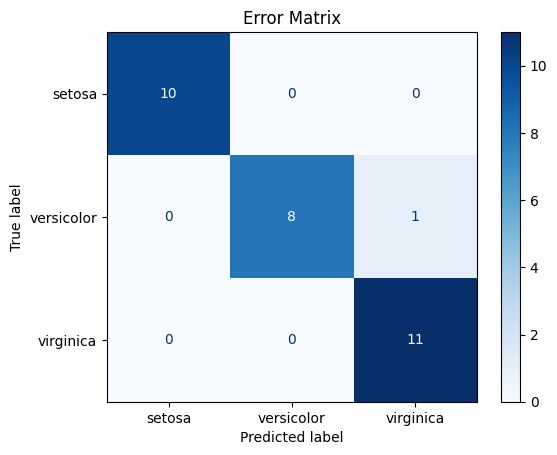

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Blues')
plt.title("Error Matrix")
plt.show()

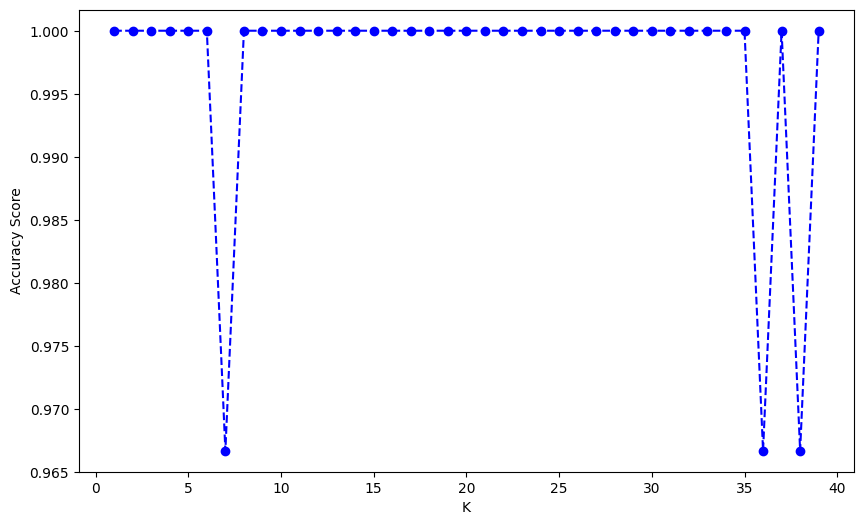

In [74]:
error_rate = []

for i in range(1, 40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # error_rate.append(np.mean(pred_i != y_test))
    error_rate.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

### 🔹 Тапсырма 2 (Intermediate)

In [75]:
# 1. Standart Scaling 

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)


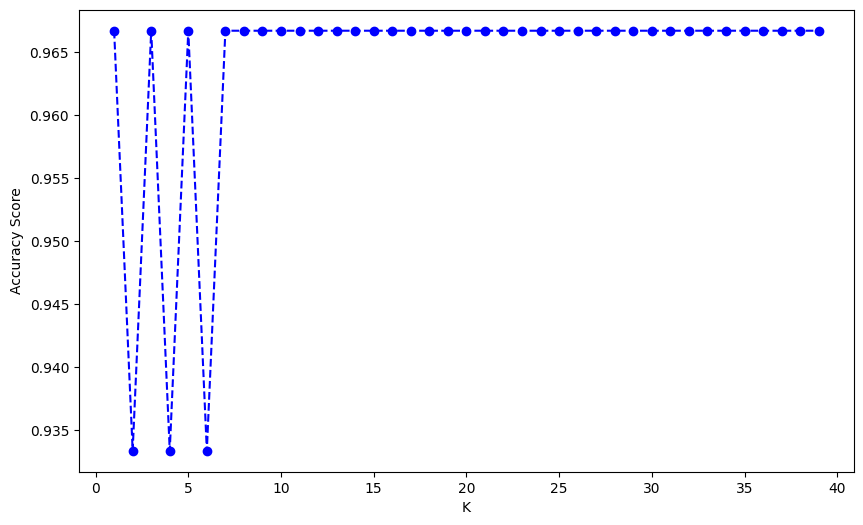

In [42]:
error_rate = []

for i in range(1, 40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaler, y_train)
    pred_i = knn.predict(X_test_scaler)
    # error_rate.append(np.mean(pred_i != y_test))
    error_rate.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy Score')
plt.show()

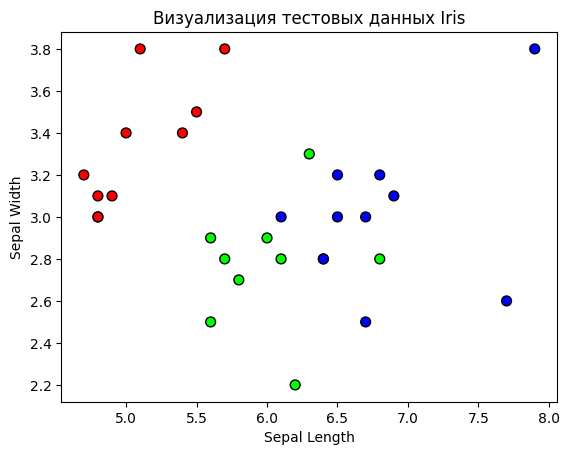

In [43]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder

# 1. Создаем кодировщик
le = LabelEncoder()

# 2. Превращаем текстовые названия в числа (0, 1, 2)
y_encoded = le.fit_transform(y_test)

# 1. Создаем палитру (переменная cmap_bold)
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 2. Визуализируем
# Мы убрали кавычки у cmap_bold, исправили edgecolor и используем y_test
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_encoded, cmap=cmap_bold, edgecolor='k', s=50)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title("Визуализация тестовых данных Iris")
plt.show()

## ✅ 2-БӨЛІМ. SVM — ТАПСЫРМАЛАР

### 🔹 Тапсырма 4 (Beginner)

0.9666666666666667


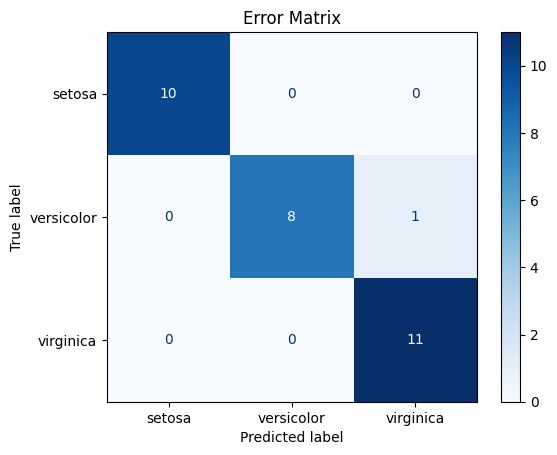

In [44]:
from sklearn import svm 

model_svm = svm.SVC(kernel='linear', C=10, gamma=0.22)
model_svm.fit(X_train, y_train)
accuracy_svm = model_svm.score(X_test, y_test)

print(accuracy_svm)

ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test, cmap='Blues')
plt.title("Error Matrix")
plt.show()

1.0


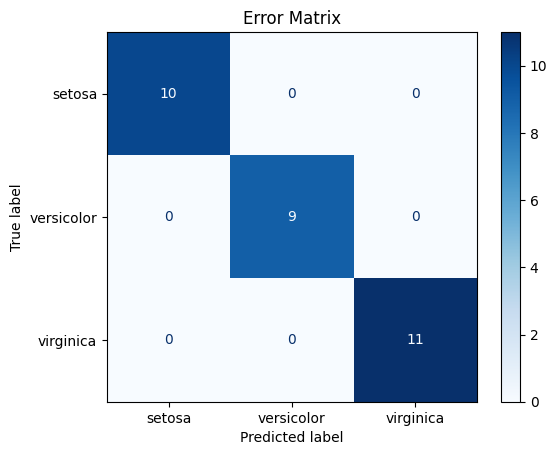

In [45]:
model_svm = svm.SVC(kernel='rbf', C=10, gamma=0.22)
model_svm.fit(X_train, y_train)
accuracy_svm = model_svm.score(X_test, y_test)

print(accuracy_svm)

ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test, cmap='Blues')
plt.title("Error Matrix")
plt.show()

1.0


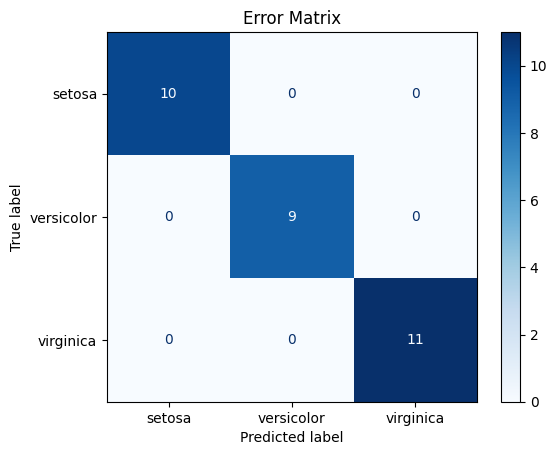

In [46]:
model_svm = svm.SVC(kernel='poly', C=10, gamma=0.22)
model_svm.fit(X_train, y_train)
accuracy_svm = model_svm.score(X_test, y_test)

print(accuracy_svm)

ConfusionMatrixDisplay.from_estimator(model_svm, X_test, y_test, cmap='Blues')
plt.title("Error Matrix")
plt.show()

### 🔹 Тапсырма 5 (Intermediate)


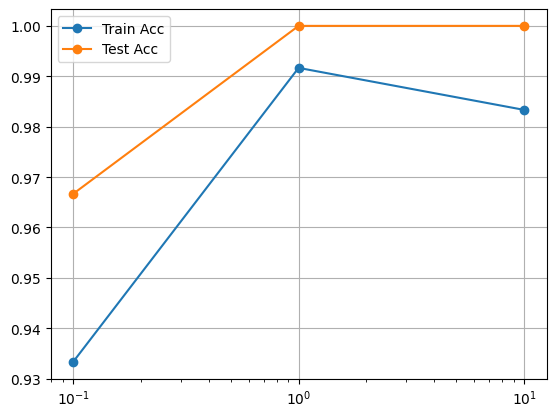

In [47]:
def svm_compare(X_train, X_test, y_train, y_test) -> None:
    Accuracy_train = []
    Accuracy_test = []
    c_value = [0.1, 1.0, 10.0]

    for i in c_value:
        model = svm.SVC(kernel='rbf', C = i, gamma=0.22)
        model.fit(X_train, y_train)
        Accuracy_train.append(model.score(X_train, y_train))
        Accuracy_test.append(model.score(X_test, y_test))

    plt.plot(c_value, Accuracy_train, label='Train Acc', marker='o')
    plt.plot(c_value, Accuracy_test, label='Test Acc', marker='o')
    plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()

svm_compare(X_train, X_test, y_train, y_test)

### 🔹 Тапсырма 6 (Advanced)


In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.22, 1],
    'kernel': ['rbf', 'linear', 'poly']
}

model_grid = GridSearchCV(svm.SVC(), param_grid, verbose=1)
model_grid.fit(X_train, y_train)

print(f"Best parametrs: {model_grid.best_params_}")
print(f"Best score: {model_grid.best_score_}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parametrs: {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}
Best score: 0.9583333333333334


## ✅ 3-БӨЛІМ. NAIVE BAYES — ТАПСЫРМАЛАР

### 🔹 Тапсырма 7 (Beginner)


In [49]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['rbf', 'linear', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >

In [50]:
model_grid.score(X_test, y_test)

1.0

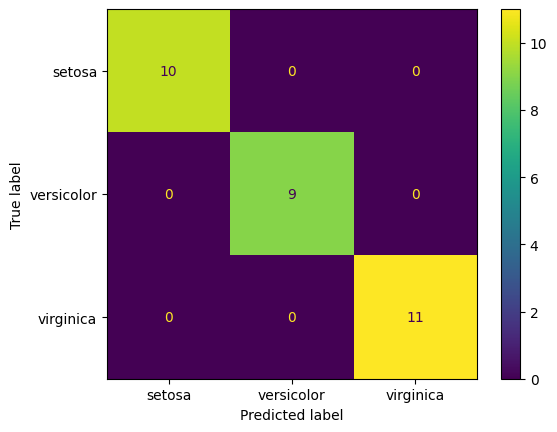

In [51]:
ConfusionMatrixDisplay.from_estimator(model_grid, X_test, y_test)

In [52]:
cr = classification_report(y_test, y_pred) 
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### 🔹 Тапсырма 8 (Intermediate)


In [53]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [54]:
categories = ['sci.space', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

X_fetch = newsgroups.data 
y_fetch = newsgroups.target 

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fetch, y_fetch, test_size=0.2, random_state=42)

In [55]:
vectorizer = TfidfVectorizer() # Term Frequency-Inverse Document Frequency

X_train_tfidf = vectorizer.fit_transform(X_train_f)
X_test_tfidf = vectorizer.transform(X_test_f)

In [56]:
print(X_train_f[0])

From: gwh@soda.berkeley.edu (George William Herbert)
Subject: Re: Moonbase race
Organization: Retro Aerospace
Lines: 14
NNTP-Posting-Host: soda.berkeley.edu
Summary: Hmm...

Hmm.  $1 billion, lesse... I can probably launch 100 tons to LEO at
$200 million, in five years, which gives about 20 tons to the lunar
surface one-way.  Say five tons of that is a return vehicle and its
fuel, a bigger Mercury or something (might get that as low as two
tons), leaving fifteen tons for a one-man habitat and a year's supplies?
Gee, with that sort of mass margins I can build the systems off
the shelf for about another hundred million tops.  That leaves
about $700 million profit.  I like this idea 8-)  Let's see
if you guys can push someone to make it happen 8-) 8-)

[slightly seriously]

-george william herbert
Retro Aerospace



In [57]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train_f)
y_pred = nb_model.predict(X_test_tfidf)

accuracy_nb_model = accuracy_score(y_test_f, y_pred)
accuracy_nb_model

0.9752321981424149

In [58]:
print(confusion_matrix(y_test_f, y_pred))

# ConfusionMatrixDisplay.from_estimator(nb_model, X_test_tfidf, y_test)

[[211   0]
 [  8 104]]


### 🔹 Тапсырма 9 (Advanced)


In [59]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import time

categories = ['sci.space', 'talk.religion.misc']
data = fetch_20newsgroups(subset='all', categories=categories)
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Векторизация TF-IDF.  
# TF-IDF (от англ. Term Frequency — Inverse Document Frequency)

""" 
    TF = Количество повторений слова / Общее количество слов в тексте

    IDF = log ( {Общее количество документов} / {Количество документов, где встречается слово} )

"""

vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    "Naive Bayes": MultinomialNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

print(f"{'Модель':<20} | {'Точность':<10} | {'Время (сек)':<10}")
print("-" * 45)

for name, model in models.items():
    start_time = time.time()
    
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    duration = time.time() - start_time
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name:<20} | {accuracy:<10.4f} | {duration:<10.4f}")

Модель               | Точность   | Время (сек)
---------------------------------------------
Naive Bayes          | 0.9876     | 0.0022    
KNN (k=5)            | 0.9752     | 0.0105    
Decision Tree        | 0.9412     | 0.1609    


## ✅ 4-БӨЛІМ. DECISION TREE — ТАПСЫРМАЛАР


### 🔹 Тапсырма 10 (Beginner)
### 🔹 Тапсырма 11 (Intermediate)

In [60]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

Accuracy Train: 0.95
Accuracy Test: 0.9666666666666667


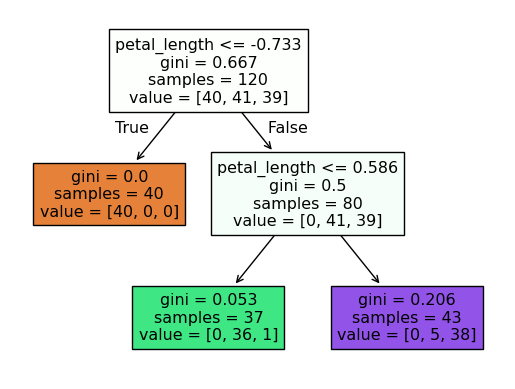

Feature: sepal_length | Important: 0.0000
Feature: sepal_width | Important: 0.0000
Feature: petal_length | Important: 1.0000
Feature: petal_width | Important: 0.0000


In [80]:
model_tree = DecisionTreeClassifier(max_depth=2)
model_tree.fit(X_train_scaler, y_train)

acc_train = accuracy_score(y_train, model_tree.predict(X_train_scaler))
acc_test = accuracy_score(y_test, model_tree.predict(X_test_scaler))

feature_names = df.columns


print(f"Accuracy Train: {acc_train}")
print(f"Accuracy Test: {acc_test}")

plot_tree(model_tree, feature_names=feature_names, filled=True)
plt.show()

importances = model_tree.feature_importances_
for name, val in zip(feature_names, importances):
    print(f"Feature: {name} | Important: {val:.4f}")

Accuracy Train: 0.975
Accuracy Test: 1.0


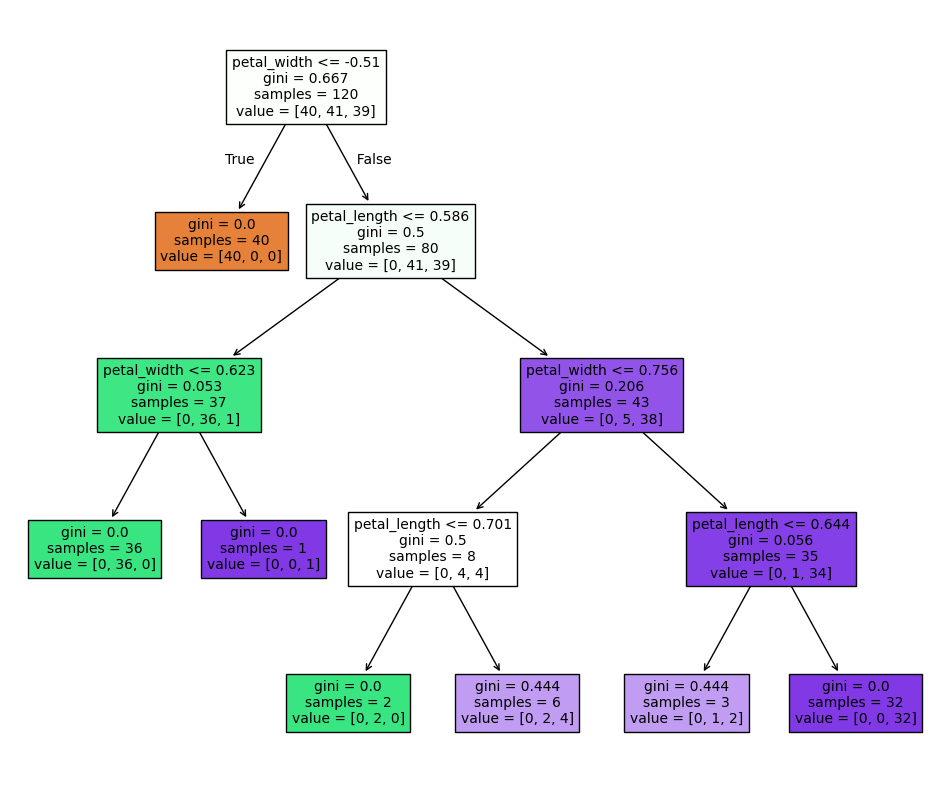

Feature: sepal_length | Important: 0.0000
Feature: sepal_width | Important: 0.0000
Feature: petal_length | Important: 0.4098
Feature: petal_width | Important: 0.5902


In [ ]:
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train_scaler, y_train)

acc_train = accuracy_score(y_train, model_tree.predict(X_train_scaler))
acc_test = accuracy_score(y_test, model_tree.predict(X_test_scaler))

print(f"Accuracy Train: {acc_train}")
print(f"Accuracy Test: {acc_test}")

plt.figure(figsize=(12,10))
plot_tree(model_tree, feature_names=feature_names, filled=True)
plt.show()

importances = model_tree.feature_importances_
for name, val in zip(feature_names, importances):
    print(f"Feature: {name} | Important: {val:.4f}")

Accuracy Train: 1.0
Accuracy Test: 0.9666666666666667


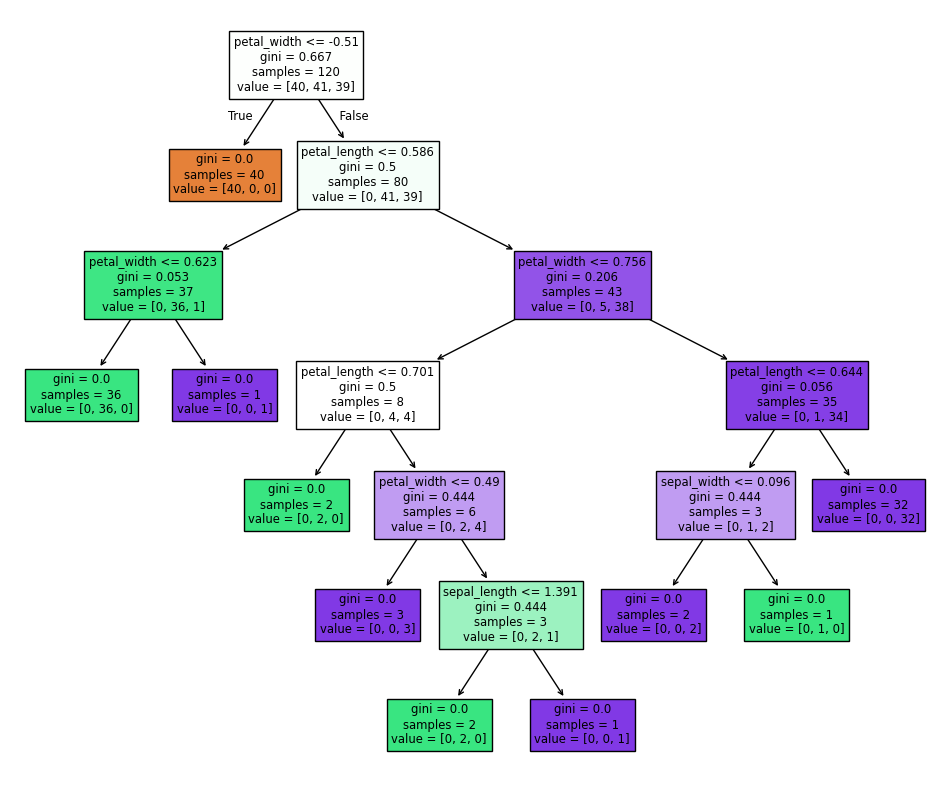

Feature: sepal_length | Important: 0.0167
Feature: sepal_width | Important: 0.0167
Feature: petal_length | Important: 0.3893
Feature: petal_width | Important: 0.5774


In [81]:
model_tree = DecisionTreeClassifier(max_depth=6)
model_tree.fit(X_train_scaler, y_train)

acc_train = accuracy_score(y_train, model_tree.predict(X_train_scaler))
acc_test = accuracy_score(y_test, model_tree.predict(X_test_scaler))

print(f"Accuracy Train: {acc_train}")
print(f"Accuracy Test: {acc_test}")

plt.figure(figsize=(12,10))
plot_tree(model_tree, feature_names=feature_names, filled=True)
plt.show()

importances = model_tree.feature_importances_
for name, val in zip(feature_names, importances):
    print(f"Feature: {name} | Important: {val:.4f}")

### 🔹 Тапсырма 11 (Intermediate) with AI



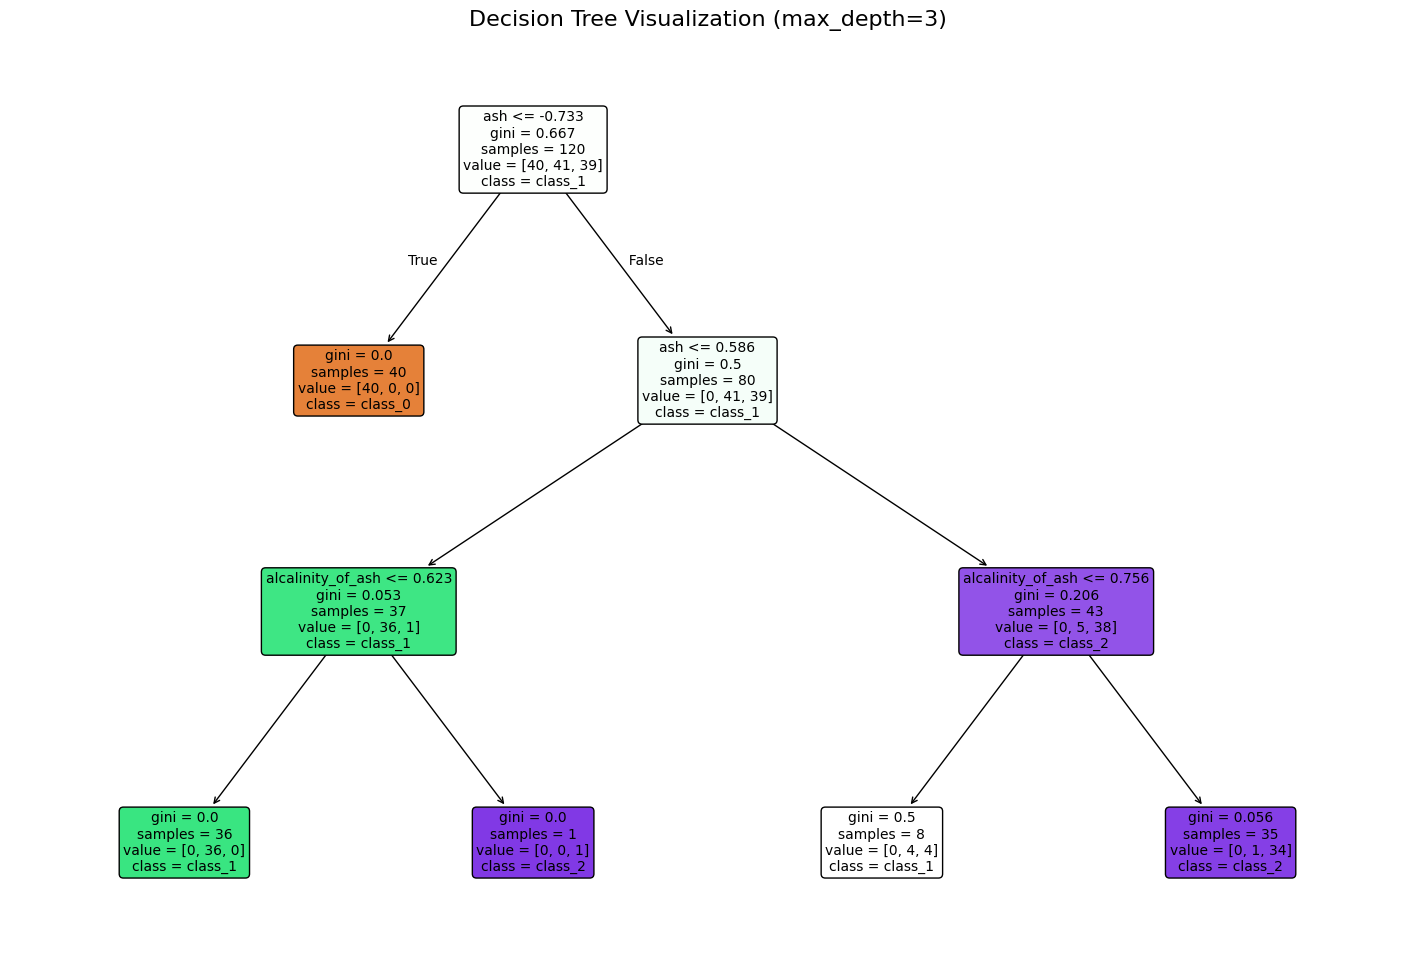

ValueError: All arrays must be of the same length

In [ ]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42) 
clf.fit(X_train_scaler, y_train)

# 3. Визуализация дерева
plt.figure(figsize=(18, 12))
plot_tree(clf, 
          feature_names=feature_names, 
          class_names=data.target_names, # Имена классов
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization (max_depth=3)", fontsize=16)
plt.show()

# 4. Определение важности признаков
# feature_importances_ - это массив, где каждый элемент соответствует важности признака
importances = clf.feature_importances_

# Создадим DataFrame для удобного просмотра
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Отсортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\nВажность признаков:")
print(feature_importance_df)

# Определение наиболее важной функции
most_important_feature = feature_importance_df.iloc[0]
print(f"\nНаиболее важная функция: '{most_important_feature['feature']}' с важностью {most_important_feature['importance']:.4f}")

## ✅ 5-БӨЛІМ. КЛАСТЕРЛЕУ — ТАПСЫРМАЛАР

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, n_init = 10, random_state=42).fit(X_train_scaled)

labels = kmeans.labels_
centers_4d = kmeans.cluster_centers_
print(labels)
print(centers_4d)

[1 1 0 1 1 2 0 1 1 1 2 0 0 1 1 2 2 0 0 0 2 0 2 1 0 2 1 1 1 2 2 1 1 1 2 1 2
 0 1 2 2 1 2 2 2 2 0 2 1 2 2 1 1 2 0 1 2 1 1 0 2 0 2 2 0 2 1 1 2 0 1 1 1 2
 0 1 0 0 1 2 2 2 0 0 1 0 2 0 2 2 2 1 2 2 1 2 0 0 1 2 0 0 1 0 1 0 0 0 2 0 2
 2 2 2 1 2 2 1 2 0]
[[ 1.21518289  0.19104108  1.02332713  1.02898814]
 [-0.99853884  0.86045175 -1.30451728 -1.25283926]
 [-0.00339323 -0.86643459  0.39172119  0.34376514]]


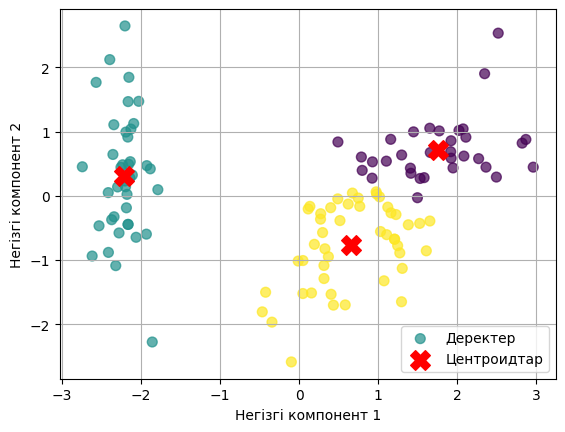

In [ ]:
from sklearn.decomposition import PCA

clusters = kmeans.fit_predict(X_train_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)   
centers_pca = pca.transform(centers_4d)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7, label='Деректер')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Центроидтар')
plt.xlabel('Негізгі компонент 1')
plt.ylabel('Негізгі компонент 2')
plt.legend()
plt.grid(True)
plt.show()

### 🔹 Тапсырма 14 (Intermediate)


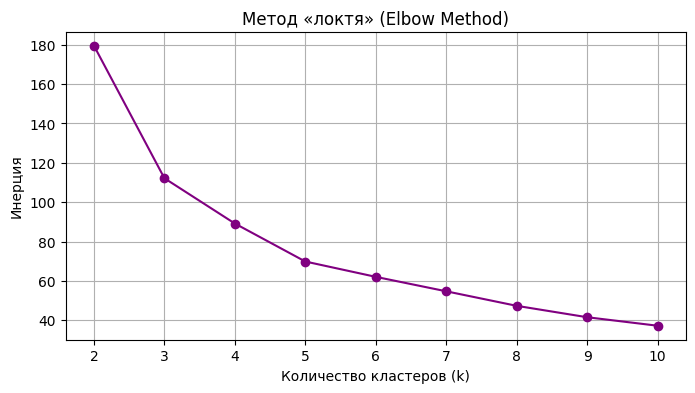

In [ ]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', color='purple')
plt.title('Метод «локтя» (Elbow Method)')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()